In [15]:
from os import chdir as cd
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Brown_MOT/Adam'

In [16]:
cd(pathin)
mot_Adam = []
for file in glob.glob('*.cha'):
    with open(file,'r') as f:
        text = f.read()
        text = text.split('\n')
        mot_Adam.append(text)

In [20]:
mlu_all = []
lu_all = []

for text in mot_Adam:
    # set up an empty list
    lu = []

    # loop through utterances and count words
    for utterance in text:
        words = utterance.split()
        num_words = len(words)
        lu.append(num_words)
    lu_all.append(lu)
    mlu = sum(lu)/len(lu)
    mlu_all.append(mlu)
    

In [22]:
# check that we have an MLU for each Adam file
len(mlu_all)

55

In [24]:
visits = list(range(1, len(mlu_all)+1, 1))
df = pd.DataFrame(
    {'Visits': visits,
     'MLU': mlu_all
    })

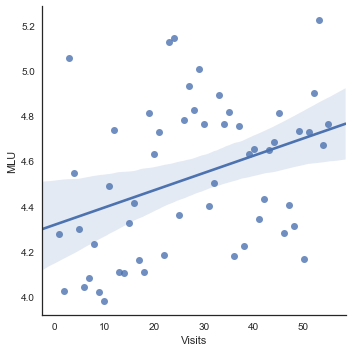

In [25]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.lmplot(x = "Visits", y= "MLU", data = df)